# Exercise 01.1

Create a function that receives two inputs a and b, and returns the product of the a decimal of pi and the b decimal of pi.

```
i.e, 
pi = 3.14159
if a = 2 and b = 4
result = 4 * 5
result = 20
```

Caveats:
- a and b are between 1 and 15
- decimals positions 1 and 2 are 1 and 4, respectively. (remember that python start indexing in 0)

In [14]:
from math import pi
def mult_dec_pi(a, b):
    
    if(a<=15 and b<=15):
        stringPi=str(pi)
        digitA= stringPi[1+a]
        digitB= stringPi[1+b]

        intA=int(digitA)
        intB=int(digitB)

        result = intA*intB
        return result
    else:
        return "Error"
    

In [15]:
mult_dec_pi(a=2, b=4)
# 20.0

20

In [16]:
mult_dec_pi(a=5, b=10)
# 45.0

45

In [17]:
mult_dec_pi(a=14, b=1)
# 9.0

9

In [18]:
mult_dec_pi(a=6, b=8)
# 10.0

10

In [19]:
# Bonus
mult_dec_pi(a=16, b=4)
# 'Error'

'Error'

# Exercise 01.2

Using the given dataset. Estimate a linear regression between Employed and GNP.

$$Employed = b_0 + b_1 * GNP $$

$$\hat b = (X^TX)^{-1}X^TY$$
$$Y = Employed$$
$$X = [1  \quad GNP]$$

Text(0,0.5,'Employed')

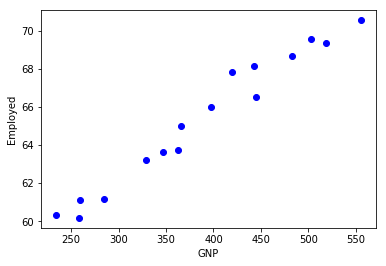

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
# Import data
raw_data = """
Year,Employed,GNP
1947,60.323,234.289
1948,61.122,259.426
1949,60.171,258.054
1950,61.187,284.599
1951,63.221,328.975
1952,63.639,346.999
1953,64.989,365.385
1954,63.761,363.112
1955,66.019,397.469
1956,67.857,419.18
1957,68.169,442.769
1958,66.513,444.546
1959,68.655,482.704
1960,69.564,502.601
1961,69.331,518.173
1962,70.551,554.894"""

data = []
for line in raw_data.splitlines()[2:]:
    words = line.split(',')
    data.append(words)
data = np.array(data, dtype=np.float)
n_obs = data.shape[0]
plt.plot(data[:, 2], data[:, 1], 'bo')
plt.xlabel("GNP")
plt.ylabel("Employed")

In [30]:
# Polinomial fit to a line. 
linearFit= sp.polyfit(data[:, 2], data[:, 1],1)
linearFit 

array([3.47522943e-02, 5.18435898e+01])

Text(0,0.5,'Employed')

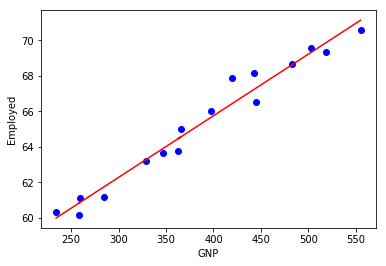

In [31]:
# Linear fit plot. 
plt.plot(data[:, 2], data[:, 1], 'bo')
x=data[:, 2]
b0=linearFit[1]
b1=linearFit[0]
plt.plot(x,b0+b1*x,color="red")
plt.xlabel("GNP")
plt.ylabel("Employed")

# Exercise 01.3

Analyze the baby names dataset using pandas

In [33]:
import pandas as pd
# Load dataset
import zipfile
with zipfile.ZipFile('../datasets/baby-names2.csv.zip', 'r') as z:
    f = z.open('baby-names2.csv')
    names = pd.io.parsers.read_table(f, sep=',')

In [34]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [35]:
names[names.year == 1993].head()   

,year,name,prop,sex,soundex
113000,1993,Michael,0.024010,boy,M240
113001,1993,Christopher,0.018572,boy,C623
113002,1993,Matthew,0.017332,boy,M300
113003,1993,Joshua,0.016268,boy,J200
113004,1993,Tyler,0.014439,boy,T460


### segment the data into boy and girl names

In [36]:
boys = names[names.sex == 'boy'].copy()    
girls = names[names.sex == 'girl'].copy()

### Analyzing the popularity of a name over time

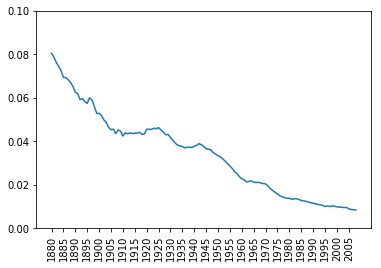

In [37]:
william = boys[boys['name']=='William']

plt.plot(range(william.shape[0]), william['prop'])
plt.xticks(range(william.shape[0])[::5], william['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

In [42]:
##### Borrar .... 
william = boys[boys['name']=='William']
william['prop']
range(william.shape[0])
william.head()

,year,name,prop,sex,soundex
1,1880,William,0.080511,boy,W450
1001,1881,William,0.078712,boy,W450
2001,1882,William,0.076191,boy,W450
3001,1883,William,0.074558,boy,W450
4001,1884,William,0.072475,boy,W450


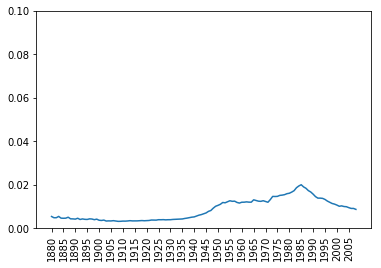

In [15]:
Daniel = boys[boys['name']=='Daniel']

plt.plot(range(Daniel.shape[0]), Daniel['prop'])
plt.xticks(range(Daniel.shape[0])[::5], Daniel['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

# Exercise 01.3

Which has been the most popular boy name every decade?

In [93]:
# Create a matrix with the information per decade. 
firstYear=boys['year'].iloc[0]
lastYear=boys['year'].iloc[boys.shape[0]-1]

numberOfDecades = int(round((lastYear-firstYear)/10-0.5))
print(numberOfDecades)
for i in range(1,numberOfDecades+1):
    maxProp=-1
    popName=" "
    decade = firstYear - 10 + 10*i 
    for j in range(0,10):
        actualYear = firstYear - 10  + j + 10*i 
        myNames = boys[boys['year']==actualYear]
        sortedNames= myNames.sort_values('prop',ascending=False)
        mostPopularName= sortedNames['name'].iloc[0]
        if(sortedNames['prop'].iloc[0]>maxProp):
            popName=mostPopularName
            maxProp=sortedNames['prop'].iloc[0]
        
        if(j==9):
            print("The most popular in: ", str(decade), " is " ,popName)


12
The most popular in:  1880  is  John
The most popular in:  1890  is  John
The most popular in:  1900  is  John
The most popular in:  1910  is  John
The most popular in:  1920  is  Robert
The most popular in:  1930  is  Robert
The most popular in:  1940  is  James
The most popular in:  1950  is  James
The most popular in:  1960  is  Michael
The most popular in:  1970  is  Michael
The most popular in:  1980  is  Michael
The most popular in:  1990  is  Michael


# Exercise 01.4

Which has been the most popular girl name?


In [49]:
girls.head()

,year,name,prop,sex,soundex
129000,1880,Mary,0.072381,girl,M600
129001,1880,Anna,0.026678,girl,A500
129002,1880,Emma,0.020521,girl,E500
129003,1880,Elizabeth,0.019865,girl,E421
129004,1880,Minnie,0.017888,girl,M500


In [65]:
sortedNames = girls.sort_values('prop',ascending=False)
mostPopularName= sortedNames['name'].iloc[0]
print("The most popular name over the history is: ",mostPopularName)

The most popular name over the history is:  Mary


# Exercise 01.5

What is the most popular new girl name? (new is a name that appears only in the 2000's)

In [64]:
over2000Data= girls[girls['year']>=2000]

sortedNames = over2000Data.sort_values('prop',ascending=False)
mostPopularName= sortedNames['name'].iloc[0]
print("The most popular name over the history is: ",mostPopularName)

The most popular name over the history is:  Emily
